In [9]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  


Lasso() 

MSE: 201155.70593338402
RMSE: 448.5038527519959
R2: 0.605646863782449


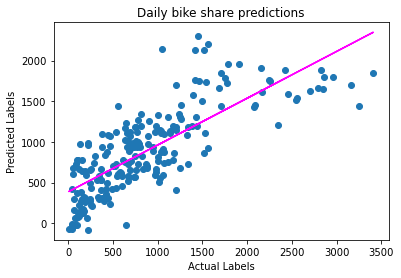

In [11]:
from sklearn.linear_model import Lasso

model = Lasso().fit(X_train, y_train)
print(model, "\n")

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Daily bike share predictions")

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model = DecisionTreeRegressor().fit(X_train, y_train)
print(model, "\n")

tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_6 <= 0.29
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_6 >  0.29
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_7 <= 0.27
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_7 >  0.27
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |   |--- val

MSE: 255963.55
RMSE: 505.92840402570795
R2: 0.49819952542978885


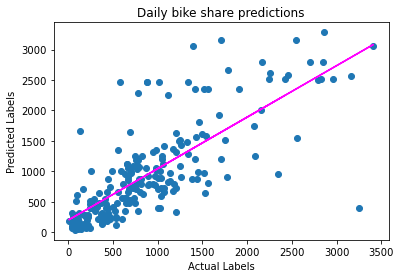

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Daily bike share predictions")

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

RandomForestRegressor() 

MSE: 117072.65739454544
RMSE: 342.1588189635705
R2: 0.7704864030844288


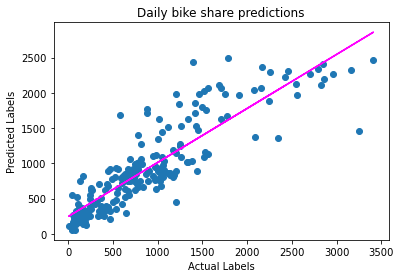

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
print(model, "\n")
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Daily bike share predictions")

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

RandomForestRegressor() 

MSE: 114173.17348954546
RMSE: 337.89521081179214
R2: 0.7761706592980095


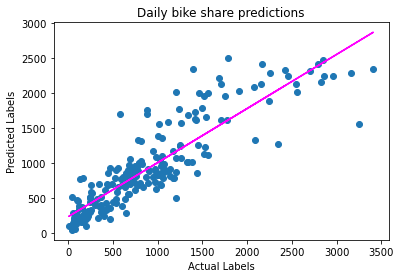

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor().fit(X_train, y_train)
print(model, "\n")

model = RandomForestRegressor().fit(X_train, y_train)
print(model, "\n")
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R2:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Daily bike share predictions")

z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()